# 합성곱 신경망

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [2]:
# Edited: for tensorflow 1.10 and above you can use 
import tensorflow.keras as keras

```terminal
#  GPU 사양 확인
!nvidia-smi
```

# 1. CNN

1958,1959년 시각 피질의 구조에 대한 통찰
 - <img src='https://t1.daumcdn.net/cfile/tistory/99413D3F5E1FB4AD23' width='600'>
 - 시각피질 안의 뉴런들이 외각 선분 특성을 가지고 합성 하는 원리

## Convolution Neural Network


**합성곱 신경망**

1998년 얀 르쿤 등 논문에서 손글씨 인식에 LeNet-5구조에서 합성곱 층, 풀링 층 구조 소개

<img src='https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2020/02/LeNet5_800px_web.jpg' width=700>

**일반적 합성곱 신경망**

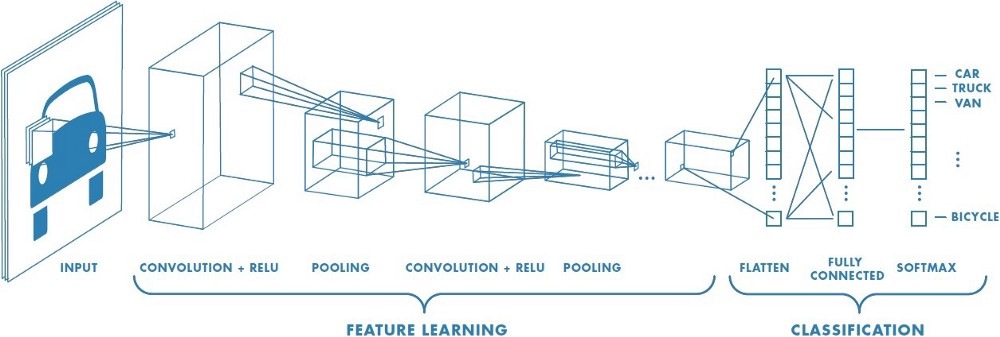

### 합성곱 층

합성곱 층에서는 입력 이미지의 특성 맵 3D tensor(convolution 연산의 kernel)에 특정 사각형 부분만을 수용한다. 이를 합성곱 연산이라 한다.

<img src='https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1' width=600>

<img src='https://miro.medium.com/max/700/1*uulvWMFJMidBfbH9tMVNTw@2x.png' width=600>(https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

###  합성곱 연산 이란?

합성곱으로 원본 각 픽셀과 주변 픽셀과 필터 픽셀 각각 곱연산 합해서 새 이미지

 - 특성 맵 생성 : 3D tensor
 - 출력 특성 맵 생성
 
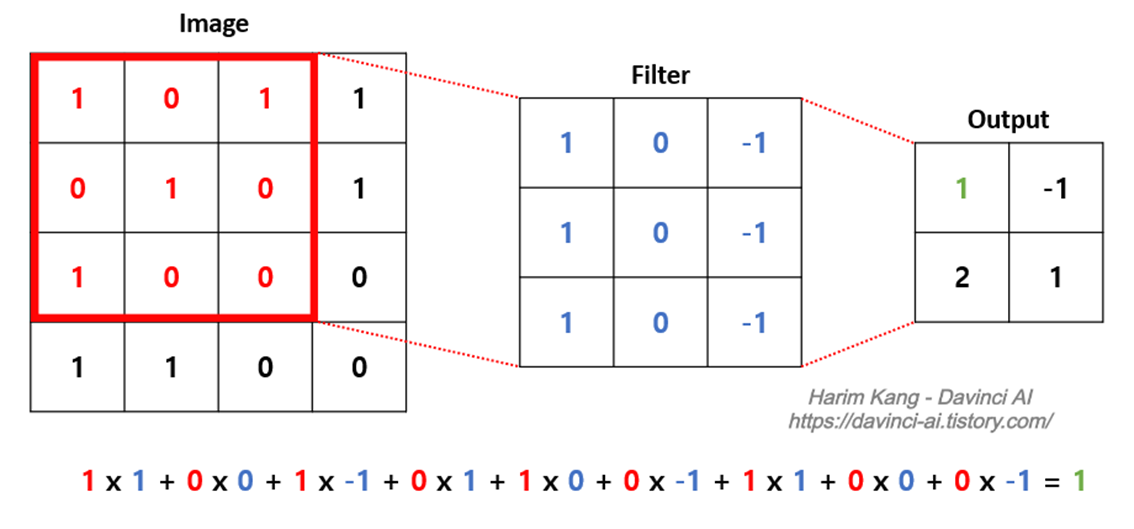

합성곱 연산의 과정
 - https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

## keras의 주요 CNN 레이어 정리

 - 시작하세요 텐서플로우 2.0

### - 케라스 합성곱 층

케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있다. 합성곱 층도 마찬가지이다. 

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

특별히 입력 위를 이동하는 합성곱은 Conv2D 클래스로 제공한다.

In [4]:
layers.Conv2D(10, kernel_size=(3,3), activation='relu')

Conv2D 클래스의 첫 번째 매개변수는 필터의 개수이다. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정한다. 필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수이다.  마지막으로 밀집층에서처럼 활성화 함수를 지정한다. 여기에선 렐루 함수를 선택했다.

In [5]:
# Conv2D 레이어 생성 코드
conv1 = layers.Conv2D(kernel_size=(3,3),
                               strides=(2,2),
                               padding='valid' ,
                               filters=16)

케라스 API 를 사용하면 합성곱 층을 사용하는 것이 어렵지 않다. 이전에 Dense 층을 사용했던 자리에 대신 Conv2D층을 넣으면 된다. 다만 kernel_size와 같이 추가적인 매개변수들은 고려해야 한다.

### - 패딩과 스트라이드
 
예를 들어 (4,4) 크기의 입력에 (3,3) 크기의 커널을 적용하여 출력의 크기를 동일하게 (4,4)로 만들려면 어떻게 해야할까?

 
(4,4) 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱하는 척해야한다. 입력 배열의 주위를 가상의 원소로 채우는 것을 패딩이라고 한다. 실제 입력값이 아니기 때문에 패딩은 0으로 채워준다. 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것밖에는 없다. 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지는 않는다.

 
이렇게 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 세임 패딩이라고 부른다. 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 패딩없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 밸리드 패딩이라고 한다. 밸리드 패딩은 특성 맵의 크기가 줄어들 수 밖에 없다.

 
적절한 패딩은 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와준다. 앞에서도 언급했지만 일반적인 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있다. 기본값은 valid로 밸리드 패딩을 나타낸다. 세임 패딩을 사용하려면 same 으로 지정한다.

In [6]:
layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

지금까지 합성곱 연산은 좌우, 위아래로 한 칸씩 이동하였다. 하지만 두 칸씩 건너뛸 수도 있다. 이렇게 두 칸씩 이동하면 만들어지는 특성 맵의 크기는 더 작아진다. 이런 이동의 크기를 스트라이드라고 한다. 기본으로 스트라이드는 1이다. 즉 한 칸씩 이동한다. 이 값이 Conv2D의 strides 매개변수의 기본값이다.

In [6]:
layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

strides 매개변수는 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있다. 하지만 커널의 이동 크기를 가로세로 방향으로 다르게 지정하는 경우는 거의 없다. 또 1보다 큰 스트라이드를 사용하는 경우도 드물다. 대부분 기본값을 그대로 사용하기 때문에 strides 매개변수는 잘 사용하지 않는다.

 

### - 풀링
 
풀링은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 특성맵의 개수는 줄이지 않는다. 예를 들면 (2,2,3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3) 크기의 특성 맵이 된다.

 
풀링도 합성곱처럽 입력 위를 지나가면서 도장을 찍는다. 하지만 풀링에는 가중치가 없다. 도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산한다. 이를 각각 최대 풀링, 평균 풀링이라고 부른다. 풀링은 합성곱 층과 뚜렷이 구분되기 때문에 풀링 층이라고 부른다.

 
풀링의 크기가 (2,2) 이면 가로세로 두 칸씩 이동한다. 즉 스트라이드가 2이다. (3,3) 풀링이면 가로세로 세 칸씩 이동한다. 풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉽다. 또 패딩도 없다. 케라스에서는 MaxPooling2D 클래스로 풀링을 수행할 수 있다.

In [7]:
layers.MaxPooling2D(2)

In [4]:
# MaxPool2D 레이어 생성 코드
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), 
                                  strides=(2,2))

합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공한다. strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정할 필요는 없다. padding의 기본값은 valid로 패딩을 하지 않는다. 풀링은 패딩을 하지 않기 때문에 이 매개변수를 바꾸는 경우는 거의 없다. 예를 들어 바로 이전에 쓴 최대 풀링과 같은 코드는 다음과 같다.

In [8]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

평균 풀링을 제공하는 클래스는 AveragePooling2D이다. 최댓값 대신 평균을 계산하는 것만 빼면 MaxPooling2D와 동일하며 제공하는 매개변수도 같다. 많은 경우 평균 풀링보다 최대 풀링을 많이 사용한다.

### - 드롭아웃층

In [5]:
# Dropout 레이어 생성 코드
pool1 = layers.Dropout(rate=0.3)

## 컨벌루션 망 구성

비교를 위해서 풀링 레이어 없이 컨볼루션만을 사용해서 모델을 정의해 보고 기본 컨브넷을 구성해 살펴보자.

### MNIST 숫자 이미지

이제 MNIST 숫자 이미지에 이 컨브넷을 훈련합니다. 2장의 MNIST 예제 코드를 많이 재사용하겠습니다.

In [5]:
# MNIST 데이터셋 불러오기 및 정규화
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# reshape 이전
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기

In [6]:
train_scaled = X_train / 255.0
test_scaled = X_test / 255.0

In [7]:
train_scaled = train_scaled.reshape(-1, 28, 28, 1)
test_scaled = test_scaled.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_scaled.shape, test_scaled.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


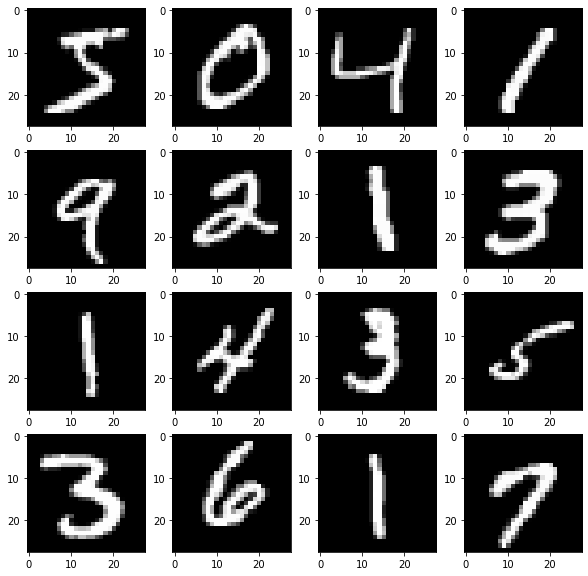

In [10]:
# 데이터 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):

    plt.subplot(4,4,c+1)
    plt.imshow(train_scaled[c].reshape(28,28), cmap='gray')
    
plt.show()

In [43]:

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(y_train[:16])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


### 3개의 컨벌루션 망

. 3개의 컨벌루션 망을 구성하고 필터의 수를 16, 32, 64로 2배씩 늘렸다. 

In [12]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3965056   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
No

In [13]:
model1.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model1.fit(train_scaled, y_train, epochs=5, batch_size=64)

Epoch 1/5


2022-01-21 09:23:37.718090: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-01-21 09:23:38.958531: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-21 09:23:39.214320: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


938/938 [==============================] - 9s 6ms/step - loss: 0.1888 - accuracy: 0.9437
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0899 - accuracy: 0.9729
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0648 - accuracy: 0.9801
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0392 - accuracy: 0.9871


In [14]:
test_loss, test_acc = model1.evaluate(test_scaled, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1091 - accuracy: 0.9731


In [15]:
test_acc

0.9731000065803528

###  기본 컨브넷

MNIST 숫자 이미지 분류에 컨브넷을 사용해 보겠습니다.  다음 코드는 기본적인 컨브넷의 모습입니다. Conv2D와 MaxPooling2D 층을 쌓아 올렸습니다.

예제에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하도록 컨브넷을 설정해야 합니다. 즉 컨브넷이 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다. 

In [16]:
model2 = models.Sequential(name='Basic_ConvNet')

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

여기까지 구조를 살펴보자

In [17]:
model2.summary()

Model: "Basic_ConvNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-tra

다음 단계에서 마지막 층의 ((3, 3, 64) 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 

In [18]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [19]:
model2.summary()

Model: "Basic_ConvNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)             

In [22]:
%%time
model2.compile(
    optimizer='adam',
    #optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model2.fit(train_scaled, y_train, epochs=5, batch_size=64, validation_split=0.25)

Epoch 1/5
704/704 [==============================] - 6s 8ms/step - loss: 0.2286 - accuracy: 0.9301 - val_loss: 0.0735 - val_accuracy: 0.9769
Epoch 2/5
704/704 [==============================] - 7s 9ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 3/5
704/704 [==============================] - 7s 9ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0457 - val_accuracy: 0.9853
Epoch 4/5
704/704 [==============================] - 7s 9ms/step - loss: 0.0317 - accuracy: 0.9894 - val_loss: 0.0425 - val_accuracy: 0.9874
Epoch 5/5
704/704 [==============================] - 7s 9ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0473 - val_accuracy: 0.9861
CPU times: user 27.7 s, sys: 11.4 s, total: 39.1 s
Wall time: 33.1 s


In [24]:
test_loss, test_acc = model2.evaluate(test_scaled, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0329 - accuracy: 0.9896


In [25]:
test_acc

0.9896000027656555

기본 컨브넷의 성능은 99% 정도.

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [26]:
def plot_loss_acc(title, loss, acc, val_loss='', val_acc=''):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss, 'b-', label='loss')
    if val_loss:
        plt.plot(val_loss, 'r--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc, 'g-', label='accuracy')
    if val_acc:
        plt.plot(val_acc, 'k--', label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.7, 1)
    plt.legend()

    plt.title(title)

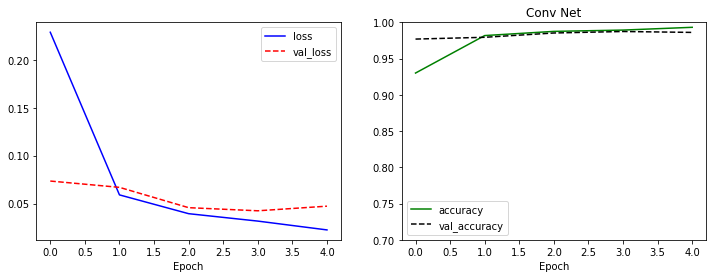

In [27]:
plot_loss_acc('Conv Net',
              history.history['loss'], 
              history.history['accuracy'], 
              history.history['val_loss'], 
              history.history['val_accuracy'], 
              )

plt.show()

# 2. 컨브넷으로 패션 MNIST 학습

앞서 MNIST 데이터를 불러온 후 데이터 스케일을 0 ~ 255 사이에서 0 ~ 1 사이로 바꾸고 훈련 세트와 검증 세트로 나눈다.

 
그리고 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 한다. 이 작업을 위해 넘파이 reshape() 메서드나 Flatten 클래스를 사용한다. 그리고 입력 이미지는 항상 깊이 차원이 있어야 한다. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해 마지막에 이 채널 차원을 추가해야 한다. 넘파이 reshape() 메서드를 사용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가할 수 있다.

In [28]:
# Fashion MNIST 데이터셋 불러오기 및 정규화
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기

In [29]:
# reshape 이전
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [30]:
train_scaled = X_train / 255.0
test_scaled = X_test / 255.0

In [31]:
train_scaled = train_scaled.reshape(-1, 28, 28, 1)
test_scaled = test_scaled.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_scaled.shape, test_scaled.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


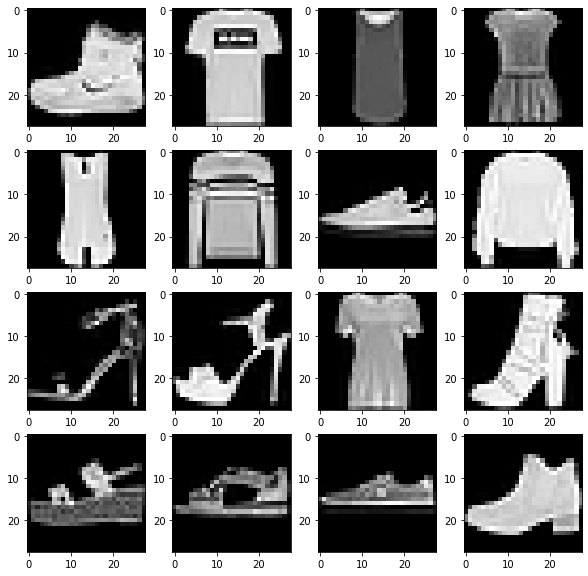

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [32]:
# 데이터 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):

    plt.subplot(4,4,c+1)
    plt.imshow(train_scaled[c].reshape(28,28), cmap='gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(y_train[:16])

## - 컨벌루션 망 구성

비교를 위해서 풀링 레이어 없이 컨볼루션만을 사용해서 모델을 정의한다. 3개의 컨벌루션 망을 구성하고 필터의 수를 16, 32, 64로 2배씩 늘렸다. 

 풀링 레이어, 드랍아웃 레이어 추가

In [34]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model3 = tf.keras.Sequential(name='Basic_ConvNet')
model3.add( tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32))
model3.add( tf.keras.layers.MaxPool2D(strides=(2,2)) )
model3.add( tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64) )
model3.add( tf.keras.layers.MaxPool2D(strides=(2,2)) )
model3.add( tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128) )
model3.add( tf.keras.layers.Flatten() )
model3.add( tf.keras.layers.Dense(units=128, activation='relu') )
model3.add( tf.keras.layers.Dropout(rate=0.3) )
model3.add( tf.keras.layers.Dense(units=10, activation='softmax'))

model3.summary()

Model: "Basic_ConvNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 1152)            

In [35]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
# history = model.fit(train_scaled, y_train, epochs=25, validation_split=0.25)

#### TqdmCallback을 사용

```python
from tqdm.keras import TqdmCallback

model.fit(X, y, epochs=25, validation_split=0.25,callbacks=[TqdmCallbak()], verbose=0)
```

In [37]:
from tqdm.keras import TqdmCallback

In [39]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model3.fit(train_scaled, y_train, epochs=25, validation_split=0.25,
                    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

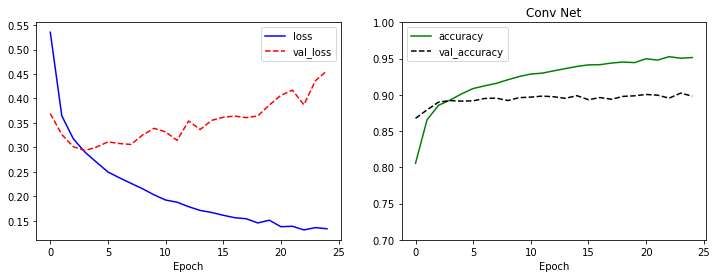

In [40]:
plot_loss_acc('Conv Net',
              history.history['loss'], 
              history.history['accuracy'], 
              history.history['val_loss'], 
              history.history['val_accuracy'])

plt.show()

In [42]:
model3.evaluate(test_scaled, y_test, verbose=0)

[0.45773833990097046, 0.8956000208854675]

2,3 Epoch 까지 적절한 학습을 보인다. 콜백을 통해 학습 진행을 조절해 보자.

###  ModelCheckpoint 와 EarlyStopping

Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현해 보자.

In [44]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn-best-fashionmnist.h5',
                                                save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)


In [45]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model3.fit(train_scaled, y_train, epochs=25, validation_split=0.25,
                    callbacks=[checkpoint_cb, earlystopping_cb, TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

정확도 그래프를 보면 2 epoch까지 ...

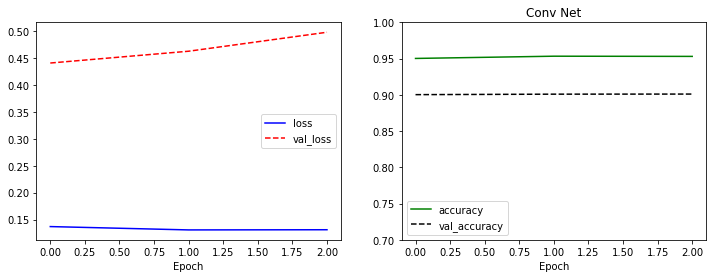

In [47]:
plot_loss_acc('Conv Net',
              history.history['loss'], 
              history.history['accuracy'], 
              history.history['val_loss'], 
              history.history['val_accuracy'])

plt.show()

이번엔 세트에 대한 성능을 평가해 보자.

In [46]:
model3.evaluate(test_scaled, y_test, verbose=0)

[0.47196292877197266, 0.8938999772071838]

이번엔 predict() 메서드를 사용해 훈련된 모델을 써서 새로운 데이터에 대해 예측을 만들어 보자.

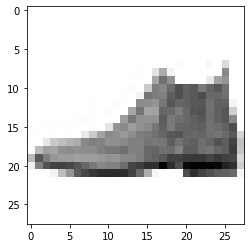

In [48]:
plt.imshow(test_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

 모델은 이 이미지에 대해 어떤 예측을 만드는지 확인해 보자. predict() 메서드는 10개의 클래스에 대한 예측 확률을 출력한다.

In [50]:
prediction = model3.predict(test_scaled[0:1])

In [ ]:
prediction.shape

(1, 10)

결과를 보면 마지막 9번 인덱스가 1에 가까운 값이다. 즉 9번째 클래스 임을 강하게 예측하고 있다. 예측 결과를 그려보자

In [51]:
prediction

array([[1.0121187e-18, 8.4221405e-22, 2.3961830e-19, 5.5065711e-20,
        6.4895692e-26, 3.7031981e-08, 4.8596200e-22, 3.2361381e-06,
        5.2637899e-22, 9.9999678e-01]], dtype=float32)

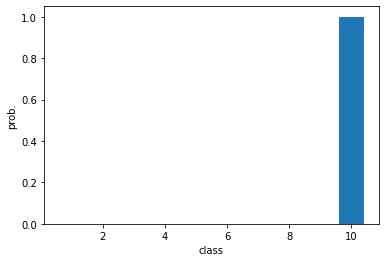

In [59]:
plt.bar(range(1, 11), prediction[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

실제 9번째 클래스가 무엇인지 

In [52]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [53]:
import numpy as np

classes[np.argmax(prediction)]

'앵클 부츠'

# 3. 퍼포먼스 높이기

성능향상 방법

1. 더 많은 레이어 쌓기
    - AlexNet(2012, 8 Layers), VGGNet(2014, 19 Layers), GoogLeNet(2014, 22 Layers),ResNet(2015, 152 Layers)
1.  이미지 보강 (Image Augmetation): 훈련 데이터를 보강하는 방식
        - 기존의 훈련 데이터가 있을 때 , 해당 데이터를 원본으로 ,여러 변형을 시켜서 해당 데이터를 학습 데이터에 포함시키는 방법

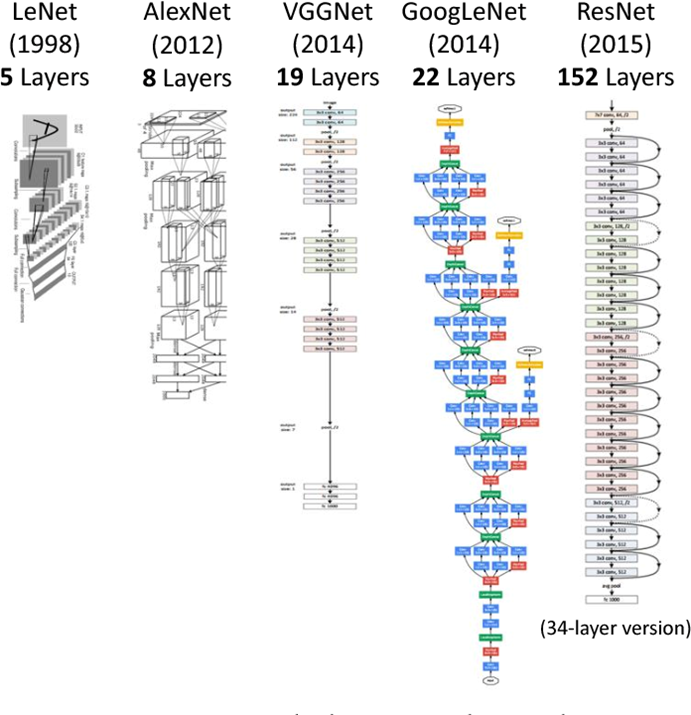

## VGGNet 스타일


In [61]:
# VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
vggmodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

vggmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [62]:
vggmodel.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [64]:
%%time
#   VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = vggmodel.fit(train_scaled, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 11s 7ms/step - loss: 0.5827 - accuracy: 0.7855 - val_loss: 0.3350 - val_accuracy: 0.8759
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3707 - accuracy: 0.8695 - val_loss: 0.2805 - val_accuracy: 0.8973
Epoch 3/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3284 - accuracy: 0.8825 - val_loss: 0.2497 - val_accuracy: 0.9061
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3037 - accuracy: 0.8910 - val_loss: 0.2553 - val_accuracy: 0.9022
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2852 - accuracy: 0.8968 - val_loss: 0.2435 - val_accuracy: 0.9083
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2793 - accuracy: 0.8988 - val_loss: 0.2355 - val_accuracy: 0.9133
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2693 - accuracy: 0.9030 - val_loss: 0.2226 - val_acc

```
GPU 0

	NVIDIA GeForce RTX 3080 Ti

	드라이버 버전:	30.0.14.9613
	드라이버 날짜:	2021-10-06
	DirectX 버전:	12 (FL 12.1)
	실제 위치:	PCI 버스 9, 장치 0, 기능 0

	사용률	97%
	전용 GPU 메모리	11.7/12.0GB
	공유 GPU 메모리	0.1/32.0GB
	GPU 메모리	11.9/44.0GB


```

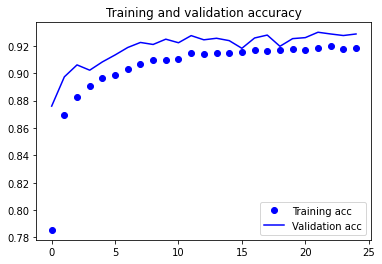

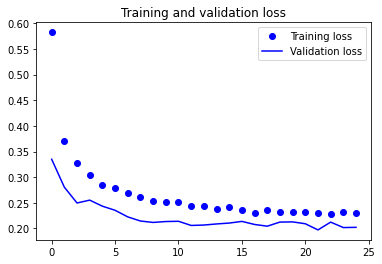

In [66]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
vggmodel.evaluate(test_scaled, y_test, verbose=0)

[0.22076515853405, 0.9221000075340271]

In [ ]:
#   VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
# Image Augmentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

In [ ]:
# VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)